In [37]:
import re
import nltk
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models
import plotly.express as px
import networkx as nx
import seaborn as sns
from pprint import pprint
from collections import Counter
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist,bigrams, trigrams,punkt
from nltk.util import ngrams
from nltk.probability import FreqDist
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from yellowbrick.text import FreqDistVisualizer
pyLDAvis.enable_notebook()

In [2]:
df= pd.read_csv('raisa1.csv')
df

Name                                            Comment  \
0       Angga Saputra  Gegara liat photo raisa di TimeSquare NY jadi ...   
1           stelliana  Ini clip 2016,video clipnya berasa liat drama ...   
2       Yusuf Zakaria  Semoga gua dapat kesempatan kedua sama sahabat...   
3     Meira Triandita  Iri banget ngeliat orang2 di komen pada happy ...   
4        Ahmad faisal                                   Backsound ps nih   
...               ...                                                ...   
6475    Nadila Andini                                               💗💗💗💗   
6476   Husin Alaydrus                                              First   
6477  Reyhan Bhaskara                                                hmm   
6478     Hersha SAIDT                                   kali kedua.mntap   
6479    Yunitha Fajar  Selamat ulang tahun yaya..sukses terus untuk k...   

                      Time  Likes  Reply Count  
0     2021-08-01T19:18:39Z      0            0  
1     2021-07-30T16:27:36Z      0            0  
2     2021-07-30T11:57:51Z      0            0  
3     2021-07-30T11:52:37Z      0            0  
4     2021-07-30T06:28:58Z      0            0  
...                    ...    ...          ...  
6475  2016-06-06T05:02:25Z      0            0  
6476  2016-06-06T05:02:18Z      0            0  
6477  2016-06-06T05:02:18Z      0            0  
6478  2016-06-06T05:01:57Z      0            0  
6479  2016-06-06T05:01:43Z      0            0  

[6480 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6480 non-null   object
 1   Comment      6479 non-null   object
 2   Time         6480 non-null   object
 3   Likes        6480 non-null   int64 
 4   Reply Count  6480 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 253.2+ KB


In [4]:
df = df.drop(columns=['Name', 'Time', 'Likes', 'Reply Count'])

In [5]:
print(df)

                                                Comment
0     Gegara liat photo raisa di TimeSquare NY jadi ...
1     Ini clip 2016,video clipnya berasa liat drama ...
2     Semoga gua dapat kesempatan kedua sama sahabat...
3     Iri banget ngeliat orang2 di komen pada happy ...
4                                      Backsound ps nih
...                                                 ...
6475                                               💗💗💗💗
6476                                              First
6477                                                hmm
6478                                   kali kedua.mntap
6479  Selamat ulang tahun yaya..sukses terus untuk k...

[6480 rows x 1 columns]


In [6]:
df.isnull().sum()

Comment    1
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df

Comment
0     Gegara liat photo raisa di TimeSquare NY jadi ...
1     Ini clip 2016,video clipnya berasa liat drama ...
2     Semoga gua dapat kesempatan kedua sama sahabat...
3     Iri banget ngeliat orang2 di komen pada happy ...
4                                      Backsound ps nih
...                                                 ...
6475                                               💗💗💗💗
6476                                              First
6477                                                hmm
6478                                   kali kedua.mntap
6479  Selamat ulang tahun yaya..sukses terus untuk k...

[6479 rows x 1 columns]

In [9]:
df = df.drop_duplicates(subset='Comment', keep="last")
print(df)

                                                Comment
0     Gegara liat photo raisa di TimeSquare NY jadi ...
1     Ini clip 2016,video clipnya berasa liat drama ...
2     Semoga gua dapat kesempatan kedua sama sahabat...
3     Iri banget ngeliat orang2 di komen pada happy ...
4                                      Backsound ps nih
...                                                 ...
6475                                               💗💗💗💗
6476                                              First
6477                                                hmm
6478                                   kali kedua.mntap
6479  Selamat ulang tahun yaya..sukses terus untuk k...

[6245 rows x 1 columns]


In [10]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [11]:
def clean(text):
    
    stop_words = set(stopwords.words('indonesian'))
    
    text = text.lower()
    
    text = re.sub(r'<br>', ' ', text)
    
    text = re.sub(r'</a>', ' ', text)
    
    text = re.sub(r'href=', ' ', text)
    
    text = re.sub(r'<[^>]*>', ' ', text)
    
    text = re.sub(r'@[A-Za-z0-9]+',' ',text)
    
    text = re.sub('https?://[A-Za-z0-9]','',text)
    
    text = re.sub('[^a-zA-Z]',' ',text)
    
    text = re.sub(r':&quot',' ', text)
    
    text = re.sub(r'&quot',' ', text)

    text = re.sub(r'quot',' ', text)
    
    text = re.sub(r'yaya',' ', text)
    
    text = re.sub(r'yaa',' ', text)
    
    text = re.sub(r'wkwkwk',' ', text)
    
    text = re.sub(r'hsil','hasil', text)
    
    text = re.sub(r'adl','adalah', text)
    
    text = re.sub(r'syg','sayang', text)
    
    text = re.sub(r'yng','yang', text)
    
    text = re.sub(r'yg','yang', text)
    
    text = re.sub(r'tdk','tidak', text)
    
    text = re.sub(r'loe','kamu', text)
    
    text = re.sub(r'gw','aku', text)
    
    text = re.sub(r'gue','aku', text)
    
    text = re.sub(r'jgn','jangan', text)
    
    text = re.sub(r'jgan','jangan', text)
    
    text = re.sub(r'td','tadi', text)
    
    text = re.sub(r'gt','', text)
    
    text = re.sub(r'gx','tidak', text)
    
    text = re.sub(r'udh','sudah', text)
    
    text = re.sub(r'lg','lagi', text)
    
    text = re.sub(r'stlh','setelah', text)
    
    text = re.sub(r'org','orang', text)
    
    text = re.sub(r'hrs','harus', text)
    
    text = re.sub(r'kgn','kangen', text)
    
    text = re.sub(r'trs','terus', text)
    
    text = re.sub(r'skg','sekarang', text)
    
    text = re.sub(r'skrg','sekarang', text)
    
    text = re.sub(r'msh','masih', text)
    
    text = re.sub(r'krn','karena', text)
    
    text = re.sub(r'dlm','dalam', text)
    
    text = re.sub(r'pd','pada', text)
    
    text = re.sub(r'sy','saya', text)
    
    text = re.sub(r'emg','memang', text)
    
    text = re.sub(r'ttp','tetapi', text)
    
    text = re.sub(r'bbrp','beberapa', text)
    
    text = re.sub(r'mntap','mantap', text)
    
    text = re.sub(r'bgt','banget', text)
    
    text = re.sub(r'klo','kalo', text)
    
    text = re.sub(r'tp','tapi', text)
    
    text = re.sub(r'lt','', text)
    
    text = re.sub(r'nicsap','nicholas saputra', text)
    
    text = re.sub(r'nicho','nicholas saputra', text)
    
    text = re.sub(r'saputralas','saputra', text)
    
    text = re.sub(r'saputralas','saputra', text)
    
    text = re.sub(r'blogspot','', text)
    
    word_stem = stemmer.stem(text)
    
    word_tokens = word_tokenize(text)
    
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_stem)
            filtered_sentence.append(word_token)

    return text

In [12]:
df['Comment'] = df['Comment'].apply(clean)
clean = df['Comment'].apply(clean)
df.head()

C:\Users\adita\AppData\Local\Temp\ipykernel_9608\2903288586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment'] = df['Comment'].apply(clean)


Comment
0  gegara liat photo raisa di timesquare ny jadi ...
1  ini clip      video clipnya berasa liat drama ...
2  semoga gua dapat kesempatan kedua sama sahabat...
3  iri banget ngeliat orang  di komen pada happy ...
4                                   backsound ps nih

In [13]:
df['Comment'].str.isspace().sum()

161

In [14]:
df.drop(df.index[df['Comment'].str.isspace() == True], inplace = True)

C:\Users\adita\AppData\Local\Temp\ipykernel_9608\2000809046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[df['Comment'].str.isspace() == True], inplace = True)


In [15]:
df['Comment'].str.isspace().sum()

0

In [16]:
df

Comment
0     gegara liat photo raisa di timesquare ny jadi ...
1     ini clip      video clipnya berasa liat drama ...
2     semoga gua dapat kesempatan kedua sama sahabat...
3     iri banget ngeliat orang  di komen pada happy ...
4                                      backsound ps nih
...                                                 ...
6474       selamat ulang tahun kak  aa sukses selaluuuu
6476                                              first
6477                                                hmm
6478                                  kali kedua mantap
6479  selamat ulang tahun    sukses terus untuk kamu...

[6084 rows x 1 columns]

In [17]:
df.to_csv("clean.csv")

In [18]:
df=pd.DataFrame(df['Comment'].astype(str))
df["Token"]=df.apply(lambda row:nltk.word_tokenize(row["Comment"]),axis=1)

In [19]:
df

Comment  \
0     gegara liat photo raisa di timesquare ny jadi ...   
1     ini clip      video clipnya berasa liat drama ...   
2     semoga gua dapat kesempatan kedua sama sahabat...   
3     iri banget ngeliat orang  di komen pada happy ...   
4                                      backsound ps nih   
...                                                 ...   
6474       selamat ulang tahun kak  aa sukses selaluuuu   
6476                                              first   
6477                                                hmm   
6478                                  kali kedua mantap   
6479  selamat ulang tahun    sukses terus untuk kamu...   

                                                  Token  
0     [gegara, liat, photo, raisa, di, timesquare, n...  
1     [ini, clip, video, clipnya, berasa, liat, dram...  
2     [semoga, gua, dapat, kesempatan, kedua, sama, ...  
3     [iri, banget, ngeliat, orang, di, komen, pada,...  
4                                  [backsound, ps, nih]  
...                                                 ...  
6474  [selamat, ulang, tahun, kak, aa, sukses, selal...  
6476                                            [first]  
6477                                              [hmm]  
6478                              [kali, kedua, mantap]  
6479  [selamat, ulang, tahun, sukses, terus, untuk, ...  

[6084 rows x 2 columns]

In [20]:


df.to_csv("ready.csv")

In [21]:
df= pd.read_csv('ready.csv')
df

Unnamed: 0                                            Comment  \
0              0  gegara liat photo raisa di timesquare ny jadi ...   
1              1  ini clip      video clipnya berasa liat drama ...   
2              2  semoga gua dapat kesempatan kedua sama sahabat...   
3              3  iri banget ngeliat orang  di komen pada happy ...   
4              4                                   backsound ps nih   
...          ...                                                ...   
6079        6474       selamat ulang tahun kak  aa sukses selaluuuu   
6080        6476                                              first   
6081        6477                                                hmm   
6082        6478                                  kali kedua mantap   
6083        6479  selamat ulang tahun    sukses terus untuk kamu...   

                                                  Token  
0     ['gegara', 'liat', 'photo', 'raisa', 'di', 'ti...  
1     ['ini', 'clip', 'video', 'clipnya', 'berasa', ...  
2     ['semoga', 'gua', 'dapat', 'kesempatan', 'kedu...  
3     ['iri', 'banget', 'ngeliat', 'orang', 'di', 'k...  
4                            ['backsound', 'ps', 'nih']  
...                                                 ...  
6079  ['selamat', 'ulang', 'tahun', 'kak', 'aa', 'su...  
6080                                          ['first']  
6081                                            ['hmm']  
6082                        ['kali', 'kedua', 'mantap']  
6083  ['selamat', 'ulang', 'tahun', 'sukses', 'terus...  

[6084 rows x 3 columns]

In [22]:
viz = df['Comment'].apply(lambda x:str(x).split())
top = Counter([item for sublist in viz for item in sublist])
temp = pd.DataFrame(top.most_common(21))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [23]:
df

Unnamed: 0                                            Comment  \
0              0  gegara liat photo raisa di timesquare ny jadi ...   
1              1  ini clip      video clipnya berasa liat drama ...   
2              2  semoga gua dapat kesempatan kedua sama sahabat...   
3              3  iri banget ngeliat orang  di komen pada happy ...   
4              4                                   backsound ps nih   
...          ...                                                ...   
6079        6474       selamat ulang tahun kak  aa sukses selaluuuu   
6080        6476                                              first   
6081        6477                                                hmm   
6082        6478                                  kali kedua mantap   
6083        6479  selamat ulang tahun    sukses terus untuk kamu...   

                                                  Token  
0     ['gegara', 'liat', 'photo', 'raisa', 'di', 'ti...  
1     ['ini', 'clip', 'video', 'clipnya', 'berasa', ...  
2     ['semoga', 'gua', 'dapat', 'kesempatan', 'kedu...  
3     ['iri', 'banget', 'ngeliat', 'orang', 'di', 'k...  
4                            ['backsound', 'ps', 'nih']  
...                                                 ...  
6079  ['selamat', 'ulang', 'tahun', 'kak', 'aa', 'su...  
6080                                          ['first']  
6081                                            ['hmm']  
6082                        ['kali', 'kedua', 'mantap']  
6083  ['selamat', 'ulang', 'tahun', 'sukses', 'terus...  

[6084 rows x 3 columns]

In [24]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', width=700, height=700,color='Common_words')
fig.show()

C:\Users\adita\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\adita\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [25]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

C:\Users\adita\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\adita\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\adita\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [26]:
print(df['Comment'])

0       gegara liat photo raisa di timesquare ny jadi ...
1       ini clip      video clipnya berasa liat drama ...
2       semoga gua dapat kesempatan kedua sama sahabat...
3       iri banget ngeliat orang  di komen pada happy ...
4                                        backsound ps nih
                              ...                        
6079         selamat ulang tahun kak  aa sukses selaluuuu
6080                                                first
6081                                                  hmm
6082                                    kali kedua mantap
6083    selamat ulang tahun    sukses terus untuk kamu...
Name: Comment, Length: 6084, dtype: object


C:\Users\adita\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



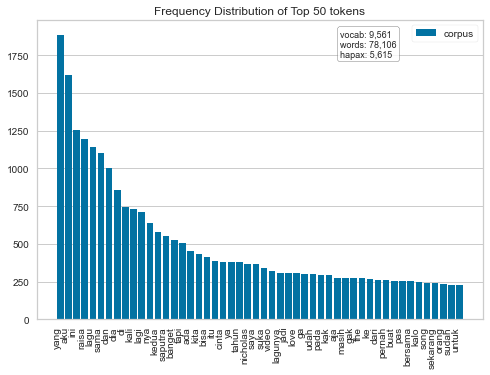

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [29]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['Comment'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

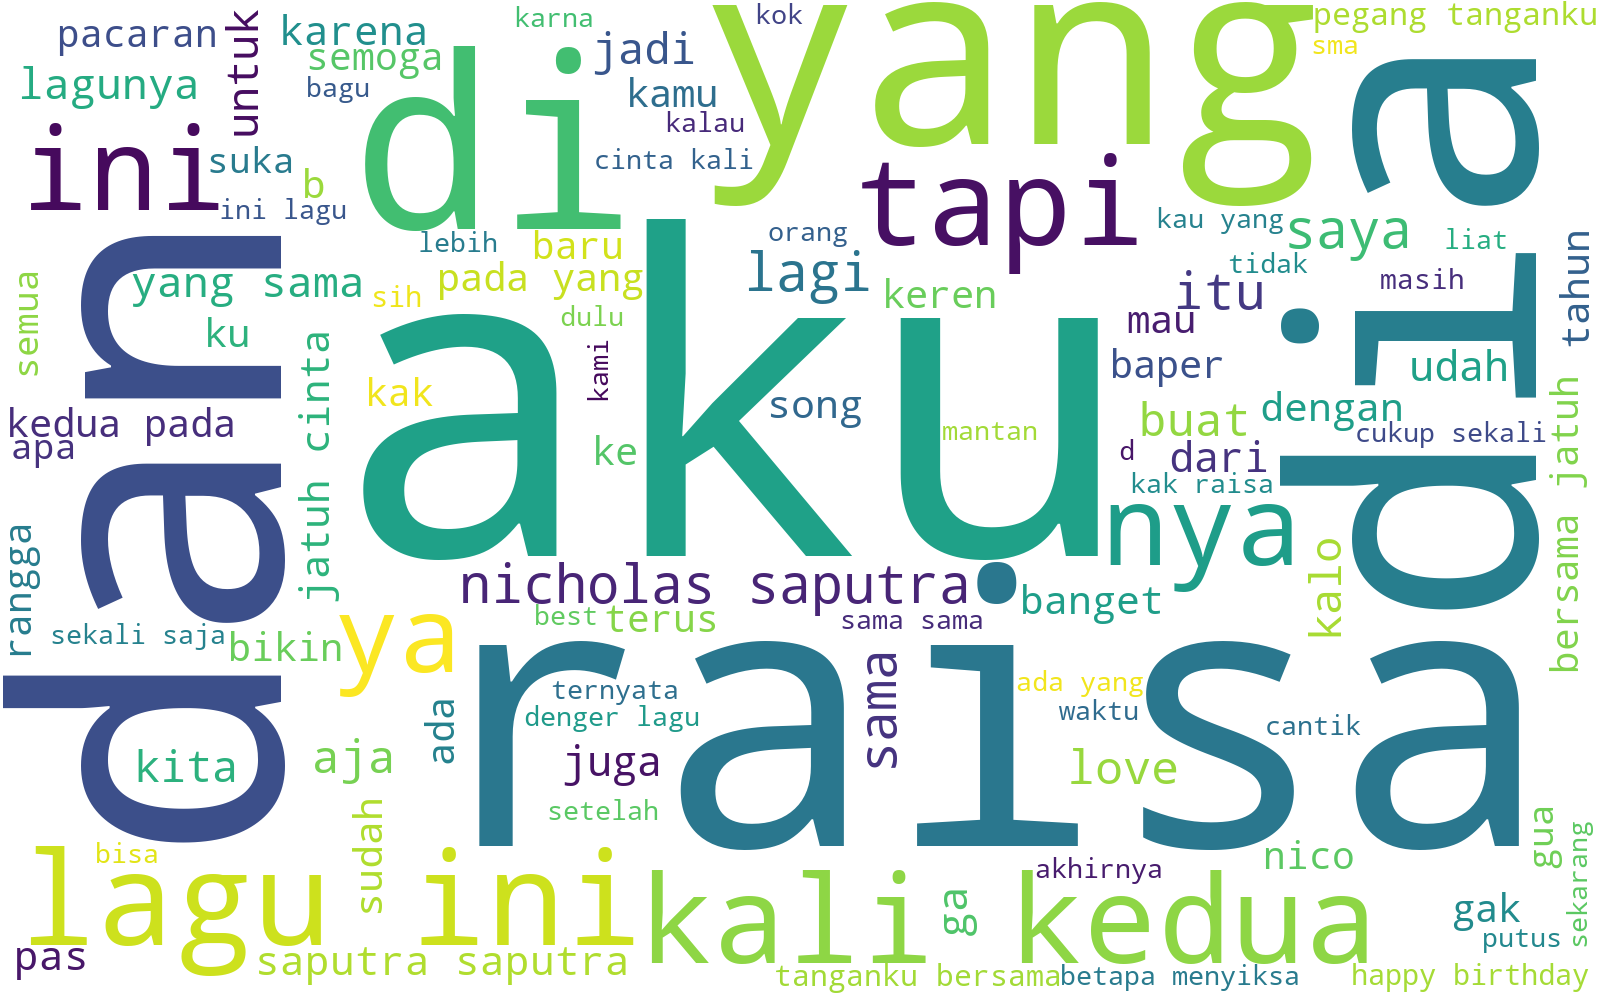

In [30]:
long_string = ','.join(list(df['Comment'].values))
wordcloud = WordCloud(background_color="white", max_words=100, width=1600, height=1000, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [34]:
stop_words = stopwords.words('indonesian')
def sent_to_words(sentences):
    for sentence in sentences:     
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.Comment.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['gegara', 'liat', 'photo', 'raisa', 'timesquare', 'ny', 'kesini', 'dah']


In [35]:
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [38]:
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics  
                                       )

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"kali" + 0.017*"cinta" + 0.015*"nya" + 0.014*"jatuh" + 0.012*"lagu" + '
  '0.012*"raisa" + 0.011*"pegang" + 0.010*"tanganku" + 0.010*"ya" + '
  '0.009*"kau"'),
 (1,
  '0.049*"lagu" + 0.018*"raisa" + 0.016*"banget" + 0.012*"kalo" + 0.012*"kali" '
  '+ 0.011*"nya" + 0.010*"denger" + 0.010*"ya" + 0.010*"ga" + 0.008*"mantan"'),
 (2,
  '0.020*"raisa" + 0.015*"saputra" + 0.012*"kali" + 0.011*"kak" + 0.011*"suka" '
  '+ 0.010*"nicholas" + 0.009*"baper" + 0.009*"lagunya" + 0.008*"nya" + '
  '0.008*"banget"'),
 (3,
  '0.025*"saputra" + 0.016*"nicholas" + 0.013*"nya" + 0.010*"lagu" + '
  '0.010*"raisa" + 0.009*"udah" + 0.009*"gak" + 0.009*"lagunya" + 0.007*"suka" '
  '+ 0.007*"aja"'),
 (4,
  '0.018*"raisa" + 0.016*"kali" + 0.012*"nya" + 0.010*"video" + 0.009*"banget" '
  '+ 0.008*"lagu" + 0.008*"kak" + 0.007*"ya" + 0.007*"nico" + 0.006*"putus"'),
 (5,
  '0.014*"gua" + 0.013*"lagu" + 0.009*"kali" + 0.009*"banget" + 0.008*"love" + '
  '0.008*"raisa" + 0.008*"pas" + 0.007*"ku" + 0.006

In [39]:
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\adita\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.010367  0.052914       1        1  15.226025
3      0.041065 -0.039339       2        1  13.182815
6     -0.004807  0.089280       3        1  12.969895
5      0.036731 -0.020708       4        1  10.691822
0     -0.101516 -0.017120       5        1  10.509545
8      0.022435  0.011592       6        1  10.179771
2     -0.069132 -0.037959       7        1   7.770290
9      0.042285  0.028734       8        1   7.327434
4     -0.033778 -0.002408       9        1   6.706343
7      0.056350 -0.064986      10        1   5.436059, topic_info=        Term         Freq        Total Category  logprob  loglift
6      raisa  1011.000000  1011.000000  Default  30.0000  30.0000
88   saputra   468.000000   468.000000  Default  29.0000  29.0000
95      kali   627.000000   627.000000  Default  28.0000  28.0000
126     lagu   993.000000   993.000000  Default  27.0000  27.0000
22       gua   119.000000   119.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
218      pas     8.760215   217.079694  Topic10  -5.7476  -0.2979
210   ketemu     7.646265   106.113448  Topic10  -5.8837   0.2818
27    banget     8.903875   446.229655  Topic10  -5.7314  -1.0022
110    jatuh     7.512364   192.725643  Topic10  -5.9013  -0.3326
54      kalo     7.043800   217.733476  Topic10  -5.9657  -0.5190

[831 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2210      1  0.206290   aadc
2210      2  0.257862   aadc
2210      3  0.072201   aadc
2210      4  0.061887   aadc
2210      5  0.061887   aadc
...     ...       ...    ...
123      10  0.068712    you
5972      8  0.837201  young
1271      1  0.752155  yovie
250       1  0.219373     yu
250       5  0.658118     yu

[2186 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 7, 6, 1, 9, 3, 10, 5, 8])

In [40]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('indonesian')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [41]:
words = basic_clean(''.join(str(df['Comment'].tolist())))

Text(0.5, 0, '# of Occurances')

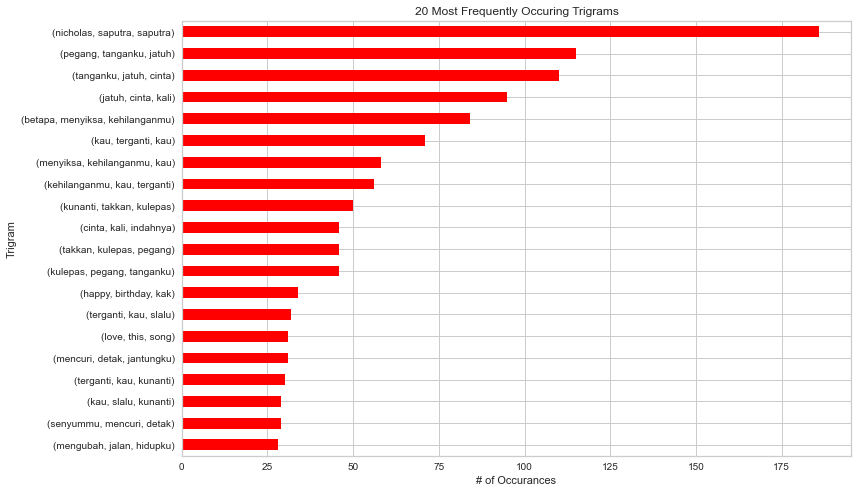

In [42]:
true_trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='red', width=.5, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [43]:
words[:20]

['gegara',
 'liat',
 'photo',
 'raisa',
 'timesquare',
 'ny',
 'kesini',
 'dah',
 'clip',
 'video',
 'clipnya',
 'berasa',
 'liat',
 'drama',
 'korea',
 'suka',
 'part',
 'raisa',
 'cantiknya',
 'nicolasnya']

In [44]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(nicholas, saputra)    343
(saputra, saputra)     186
(jatuh, cinta)         184
(tanganku, jatuh)      120
(pegang, tanganku)     120
(happy, birthday)      115
(cinta, kali)          101
(betapa, menyiksa)     100
(this, song)            98
(denger, lagu)          92
dtype: int64

In [45]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(nicholas, saputra, saputra)        186
(pegang, tanganku, jatuh)           115
(tanganku, jatuh, cinta)            110
(jatuh, cinta, kali)                 95
(betapa, menyiksa, kehilanganmu)     84
(kau, terganti, kau)                 71
(menyiksa, kehilanganmu, kau)        58
(kehilanganmu, kau, terganti)        56
(kunanti, takkan, kulepas)           50
(cinta, kali, indahnya)              46
dtype: int64

Text(0.5, 0, '# of Occurances')

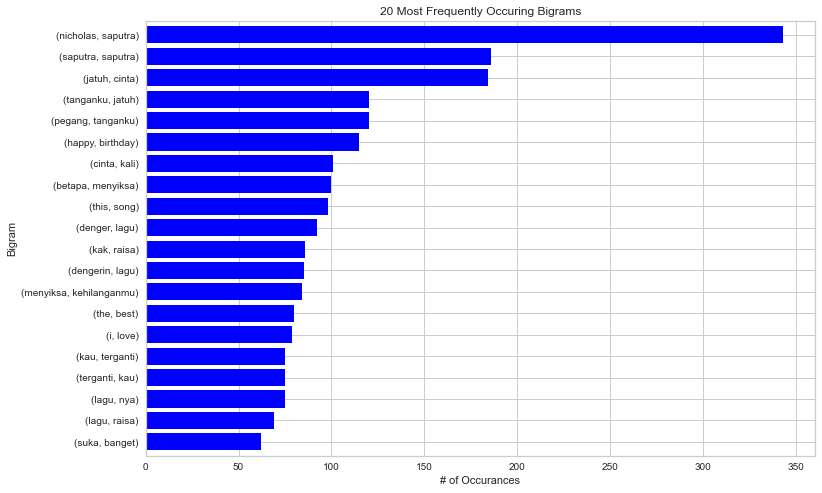

In [46]:
true_bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
true_bigrams_series.sort_values().plot.barh(color='blue', width=.8, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

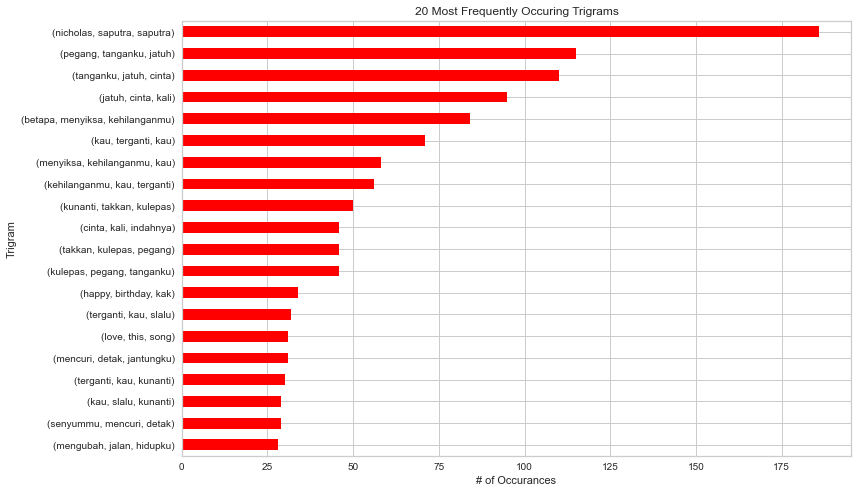

In [47]:
true_trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='red', width=.5, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')